In [1]:
#Initialize the first layer
# probably helpful preliminaries
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools

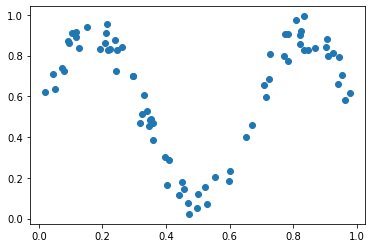

In [2]:
#Generating the data
x = np.random.uniform(0, 1.0, (75,1)).reshape(75)
y = .5 + .4* np.sin(3*np.pi * x) + np.random.uniform(-.1, .1, (75,1)).reshape(75)
data = np.concatenate((x.reshape(75,1),y.reshape(75,1)),axis=1) #all points
plt.plot(x,y,'o')


In [3]:
def kmean(data,k,x,y):
  visited = set()
  clusters = np.zeros((k,2))
  #used to selected random points at clusters
  for i in range(k):
    num = random.randrange(75)
    while num in visited:
      num = random.randrange(75)
    clusters[i] = data[num]
    visited.add(num)
  prevClusterCenters = np.zeros((k,2)) #used to keep track of the previous clusters
  point_labels = np.zeros((75))

  while (np.sum(clusters-prevClusterCenters)!= 0 ): #stops when no more clusters move
    prevClusterCenters = np.array(clusters)
    for i in range(len(data)): #used to assign points a cluster
      min  = 10000000000
      index = 0
      for j in range(k):#used to find the min distance from the point to all clusters
        dist = np.sqrt((data[i][1]-clusters[j][1])**2 + (data[i][0]-clusters[j][0])**2)
        if dist<min:
          min = dist
          index = j #the index to assign that point to
      point_labels[i] = index
    for i in range(k):#used to update clusters
      sum_x = 0
      sum_y = 0
      count = 0
      for j in range(75):
        if point_labels[j] == i:
          count+=1
          sum_x += data[j][0]
          sum_y += data[j][1]
      if count>0:
        clusters[i][0] = sum_x/count
        clusters[i][1] = sum_y/count
  plt.scatter(x,y,c=point_labels,s=25, cmap = 'viridis')
  plt.show()
  plt.close()
  return clusters, point_labels

In [4]:
def computeVariance(centriods, point_labels,data):
  variance = np.zeros((len(centriods)))
  maxDist = 0.0
  calc_variance = [] #This will keep the position of all clusters that only have a value of 1 to recalc their variance at the end
  for i in range(len(centriods)):
    num_of_points = np.count_nonzero(point_labels==i)
    if(num_of_points==1): #skips all the clusters that only have 1 point
      calc_variance.append(i)
      continue
    sum = 0 #used to get the sum of the clusters
    for j in range(len(point_labels)):
      if point_labels[j] == i:
        sum = sum + (centriods[i][0]-data[j][0])**2
    #print("sum  of: ",i," ", sum, "Number of points", num_of_points)
    variance[i] = sum/(num_of_points*1.0)
  sum_of_variances = np.sum(variance[variance>0])/(np.count_nonzero(variance>0)*1.0)
  for j in calc_variance:#Calculates the variance of all clusters that only had one point
    variance[j] = sum_of_variances
  return variance
#computeVariance(centriods,point_labels,data)

In [5]:
def computeSameVariance(centriods):
  variance = np.zeros((len(centriods)))
  maxDist = 0
  for i in range(len(centriods)):
    for j in range(i+1,len(centriods)):
      distance = np.sqrt((centriods[j][0]-centriods[i][0])**2 + (centriods[j][1]-centriods[i][1])**2)
      if(maxDist<distance):
        maxDist = distance
  for i in range(len(centriods)):
    variance[i] = (maxDist/np.sqrt(2*len(centriods)))**2
  return variance
#computeSameVariance(centriods)

In [6]:
def updateWeights(weights,learning_rate,radial_functions,data):
  d = .5 + .4* np.sin(3*np.pi * data[0])
  y = np.dot(weights,radial_functions)
  return weights + (learning_rate*(data[1]-y))*radial_functions

In [7]:
#generates a formula to graph
def getYValue(weights,radial_functions):
  return np.dot(weights,radial_functions)

The following is shows the clusters for cluster number  3


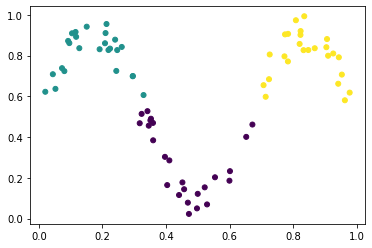

Learning rate:  0.01



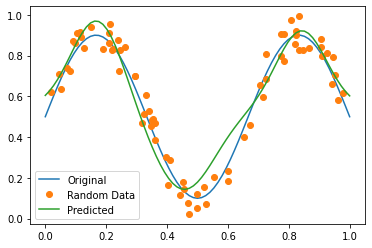

The following is shows the clusters for cluster number  6


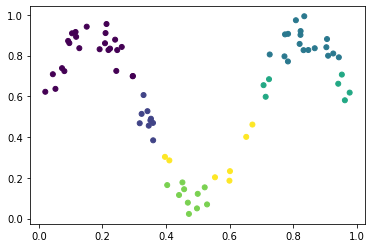

Learning rate:  0.01



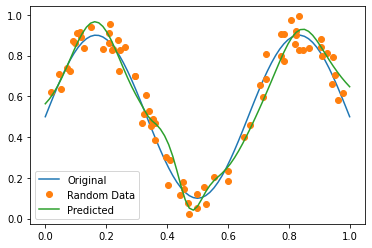

The following is shows the clusters for cluster number  9


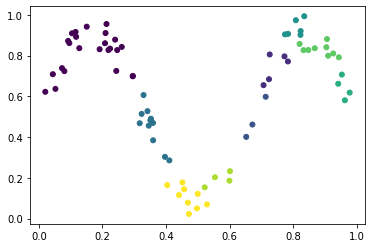

Learning rate:  0.01



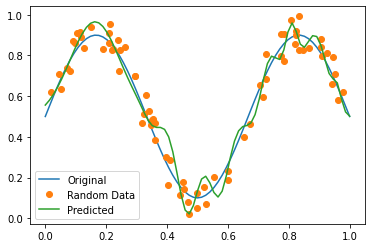

The following is shows the clusters for cluster number  12


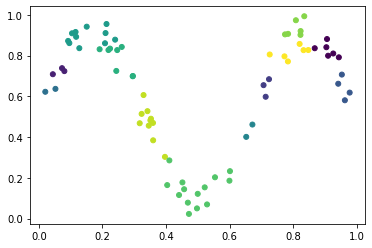

Learning rate:  0.01



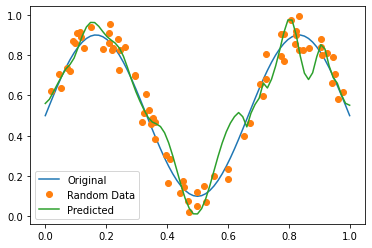

The following is shows the clusters for cluster number  16


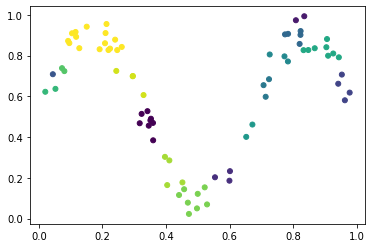

Learning rate:  0.01



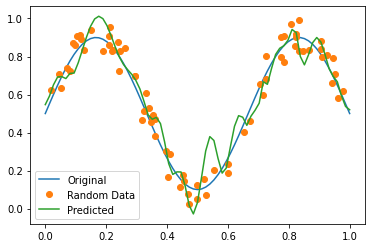

The following is shows the clusters for cluster number  3


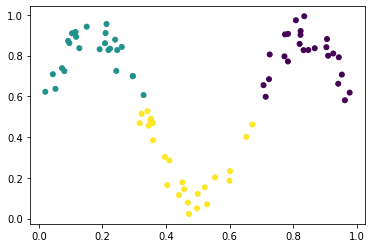

Learning rate:  0.02



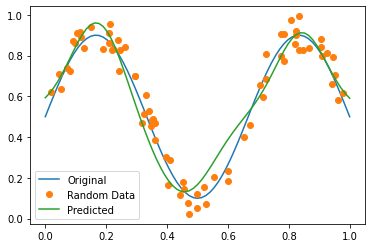

The following is shows the clusters for cluster number  6


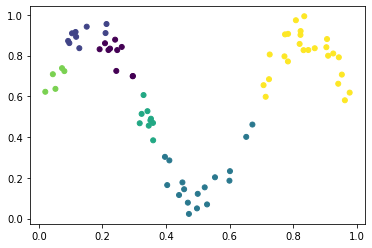

Learning rate:  0.02



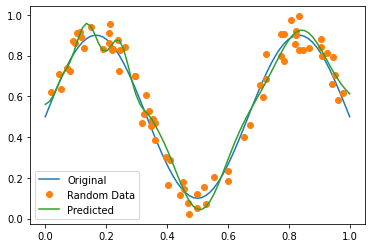

The following is shows the clusters for cluster number  9


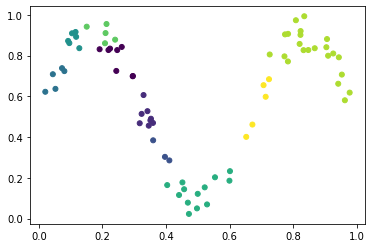

Learning rate:  0.02



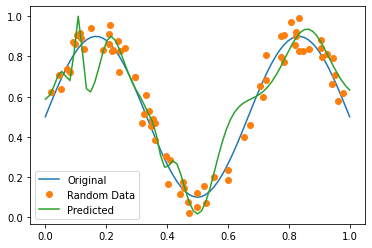

The following is shows the clusters for cluster number  12


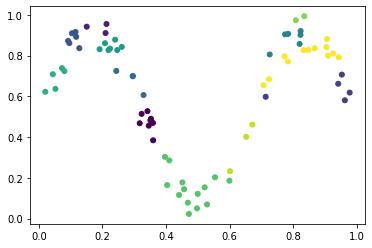

Learning rate:  0.02



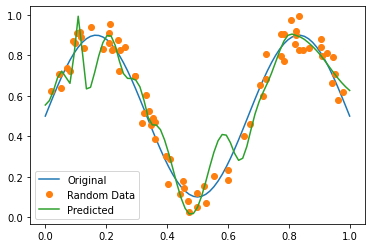

The following is shows the clusters for cluster number  16


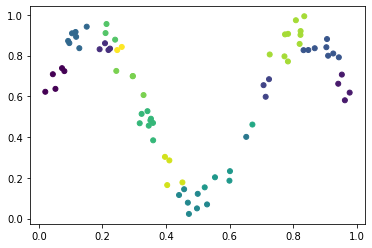

Learning rate:  0.02



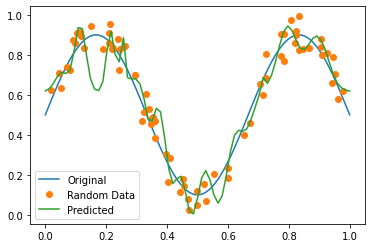

In [10]:
epoches = 100
learning_rates = [.01,.02]
n_clusters = [3,6,9,12,16]

for learning_rate in learning_rates:
  for clusters in n_clusters:
    print("The following is shows the clusters for cluster number ", clusters)
    centriods, point_labels = kmean(data,clusters,data[:,0],data[:,1]) #get the centriods centers the cluster number for each point
    variance = computeVariance(centriods,point_labels,data)
    print("Learning rate: ", learning_rate)
    print("For this run the variance is different for all clusters")
    # variance = computeSameVariance(centriods)
    weights = np.zeros((clusters+1)) #plus one because of the bias term
    for j in range(epoches):
      visited_points = set()
      for k in range(len(data)):#used to train data
        num = random.randrange(75)
        while num in visited_points:
          num = random.randrange(75) 
        radial_values = np.zeros((len(centriods)+1)) #stores all the values of the radial function
        radial_values[0] = 1 #setting the bias term
        for m in range(len(centriods)):
          diff = (data[num][0] - centriods[m][0])**2
          radial_values[m+1] = np.exp(-(1.0/(2*variance[m]))*diff)    
        weights = updateWeights(weights,learning_rate,radial_values,data[num])
        visited_points.add(num)

    x_real = np.linspace(0, 1.0, 75)   # start,stop,step
    y_real = .5 + .4*np.sin(3*np.pi * x_real)
    plt.plot(x_real,y_real)
    plt.plot(data[:,0],data[:,1],'o')
    
    y_plot = []
    for k in range(len(x_real)):#used to train data
      radial_values = np.zeros((len(centriods)+1)) #stores all the values of the radial function
      radial_values[0] = 1 #setting the bias term
      for m in range(len(centriods)):
        diff = (x_real[k] - centriods[m][0])**2
        radial_values[m+1] = np.exp(-(1.0/(2*variance[m]))*diff)    
      y_plot.append(getYValue(weights,radial_values))
    plt.plot(x_real,y_plot)
    plt.legend(['Original', 'Random Data','Predicted'])
    plt.show()
    plt.close()

The following is shows the clusters for cluster number  3


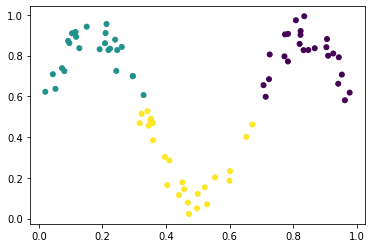

Learning rate:  0.01
For this run the variance is the same for all clusters
[0.0754833 0.0754833 0.0754833]


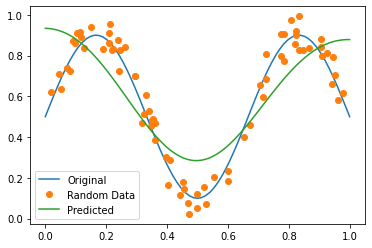

The following is shows the clusters for cluster number  6


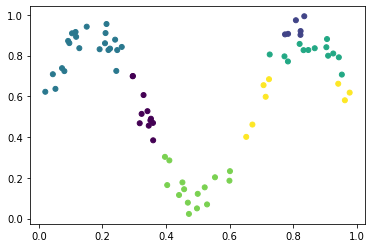

Learning rate:  0.01
For this run the variance is the same for all clusters
[0.05914438 0.05914438 0.05914438 0.05914438 0.05914438 0.05914438]


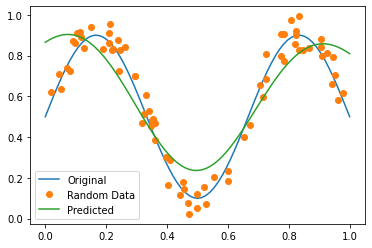

The following is shows the clusters for cluster number  9


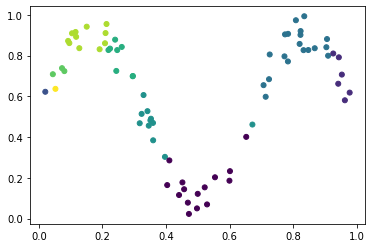

Learning rate:  0.01
For this run the variance is the same for all clusters
[0.04841373 0.04841373 0.04841373 0.04841373 0.04841373 0.04841373
 0.04841373 0.04841373 0.04841373]


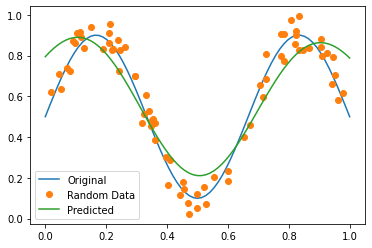

The following is shows the clusters for cluster number  12


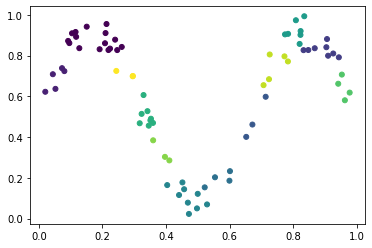

Learning rate:  0.01
For this run the variance is the same for all clusters
[0.03420823 0.03420823 0.03420823 0.03420823 0.03420823 0.03420823
 0.03420823 0.03420823 0.03420823 0.03420823 0.03420823 0.03420823]


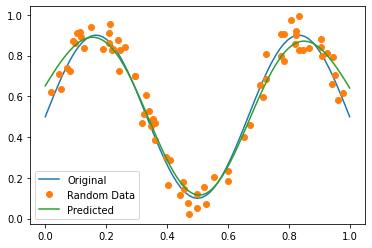

The following is shows the clusters for cluster number  16


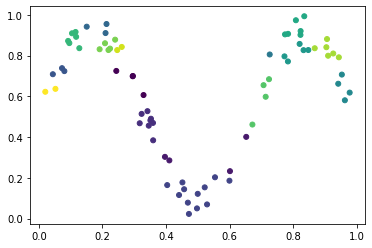

Learning rate:  0.01
For this run the variance is the same for all clusters
[0.026611 0.026611 0.026611 0.026611 0.026611 0.026611 0.026611 0.026611
 0.026611 0.026611 0.026611 0.026611 0.026611 0.026611 0.026611 0.026611]


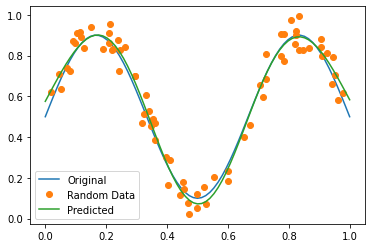

The following is shows the clusters for cluster number  3


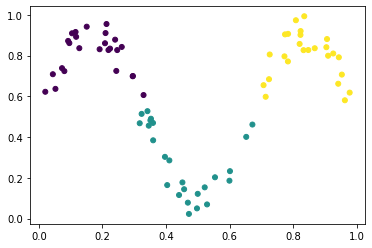

Learning rate:  0.02
For this run the variance is the same for all clusters
[0.0754833 0.0754833 0.0754833]


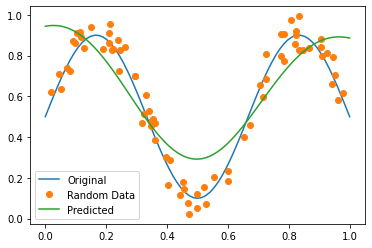

The following is shows the clusters for cluster number  6


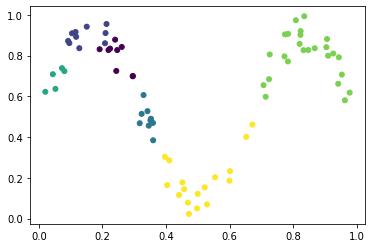

Learning rate:  0.02
For this run the variance is the same for all clusters
[0.05291476 0.05291476 0.05291476 0.05291476 0.05291476 0.05291476]


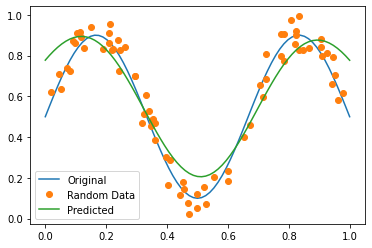

The following is shows the clusters for cluster number  9


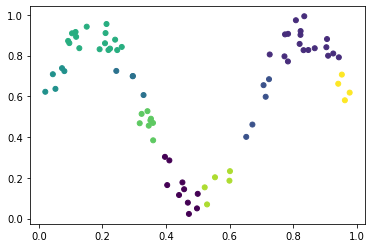

Learning rate:  0.02
For this run the variance is the same for all clusters
[0.04561097 0.04561097 0.04561097 0.04561097 0.04561097 0.04561097
 0.04561097 0.04561097 0.04561097]


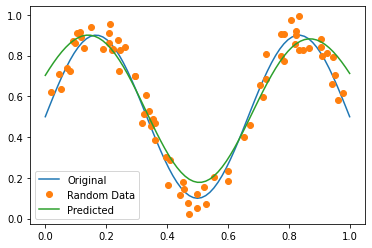

The following is shows the clusters for cluster number  12


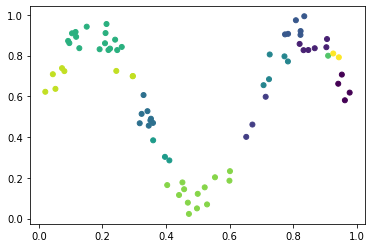

Learning rate:  0.02
For this run the variance is the same for all clusters
[0.03065671 0.03065671 0.03065671 0.03065671 0.03065671 0.03065671
 0.03065671 0.03065671 0.03065671 0.03065671 0.03065671 0.03065671]


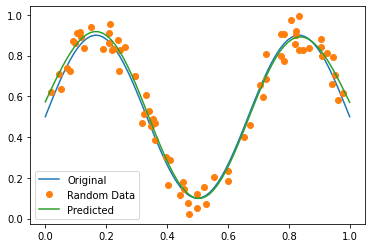

The following is shows the clusters for cluster number  16


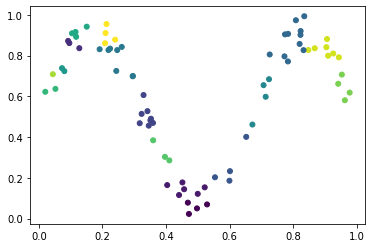

Learning rate:  0.02
For this run the variance is the same for all clusters
[0.02733695 0.02733695 0.02733695 0.02733695 0.02733695 0.02733695
 0.02733695 0.02733695 0.02733695 0.02733695 0.02733695 0.02733695
 0.02733695 0.02733695 0.02733695 0.02733695]


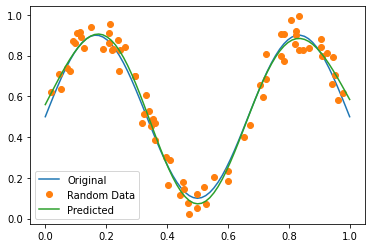

In [12]:
epoches = 100
learning_rates = [.01,.02]
n_clusters = [3,6,9,12,16]

for learning_rate in learning_rates:
  for clusters in n_clusters:
    print("The following is shows the clusters for cluster number ", clusters)
    centriods, point_labels = kmean(data,clusters,data[:,0],data[:,1]) #get the centriods centers the cluster number for each point
    print("Learning rate: ", learning_rate)
    print("For this run the variance is the same for all clusters")
    variance = computeSameVariance(centriods)
    print(variance)
    weights = np.zeros((clusters+1)) #plus one because of the bias term
    for j in range(epoches):
      visited_points = set()
      for k in range(len(data)):#used to train data
        num = random.randrange(75)
        while num in visited_points:
          num = random.randrange(75) 
        radial_values = np.zeros((len(centriods)+1)) #stores all the values of the radial function
        radial_values[0] = 1 #setting the bias term
        for m in range(len(centriods)):
          diff = (data[num][0] - centriods[m][0])**2
          radial_values[m+1] = np.exp(-(1.0/(2*variance[m]))*diff)    
        weights = updateWeights(weights,learning_rate,radial_values,data[num])
        visited_points.add(num)

    x_real = np.linspace(0, 1.0, 75)   # start,stop,step
    y_real = .5 + .4*np.sin(3*np.pi * x_real)
    plt.plot(x_real,y_real)
    plt.plot(data[:,0],data[:,1],'o')
    
    y_plot = []
    for k in range(len(x_real)):#used to train data
      radial_values = np.zeros((len(centriods)+1)) #stores all the values of the radial function
      radial_values[0] = 1 #setting the bias term
      for m in range(len(centriods)):
        diff = (x_real[k] - centriods[m][0])**2
        radial_values[m+1] = np.exp(-(1.0/(2*variance[m]))*diff)    
      y_plot.append(getYValue(weights,radial_values))
    plt.plot(x_real,y_plot)
    plt.legend(['Original', 'Random Data','Predicted'])
    plt.show()
    plt.close()